<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/HR_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [450]:
df_train = pd.read_csv("/content/train_LZdllcl.csv")
df_test = pd.read_csv("/content/test_2umaH9m.csv")
df = pd.concat([df_train,df_test], sort = False)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [451]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
employee_id             78298 non-null int64
department              78298 non-null object
region                  78298 non-null object
education               74855 non-null object
gender                  78298 non-null object
recruitment_channel     78298 non-null object
no_of_trainings         78298 non-null int64
age                     78298 non-null int64
previous_year_rating    72362 non-null float64
length_of_service       78298 non-null int64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
is_promoted             54808 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [453]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [0]:
df['previous_year_rating'].fillna(lambda x: x.mode(), inplace = True)

In [455]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [456]:
df['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [457]:
df['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [458]:
df['gender'].value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [459]:
df['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [460]:
service = df['length_of_service'].unique()
np.sort(service)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       37])

In [461]:
age = df['age'].unique()
np.sort(age)

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60])

In [462]:
df['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [463]:
df_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [0]:
'''
replace() function in pandas will help us to rename the values in a particular column
'''
dict1 = {'m':'male','f':'female'}
df_train['gender'].replace(dict1, inplace = True) 

In [465]:
'''
cross tab will give the feel of data we have. the description of columns we include will be displayed here
'''
pd.crosstab(df_train["is_promoted"],df_train["gender"],margins=True)

gender,female,male,All
is_promoted,,,
0,14845,35295,50140
1,1467,3201,4668
All,16312,38496,54808


In [466]:
k = pd.crosstab(df_train['department'],df_train['is_promoted'], margins = True)
k

is_promoted,0,1,All
department,,,
Analytics,4840,512,5352
Finance,2330,206,2536
HR,2282,136,2418
Legal,986,53,1039
Operations,10325,1023,11348
Procurement,6450,688,7138
R&D,930,69,999
Sales & Marketing,15627,1213,16840
Technology,6370,768,7138


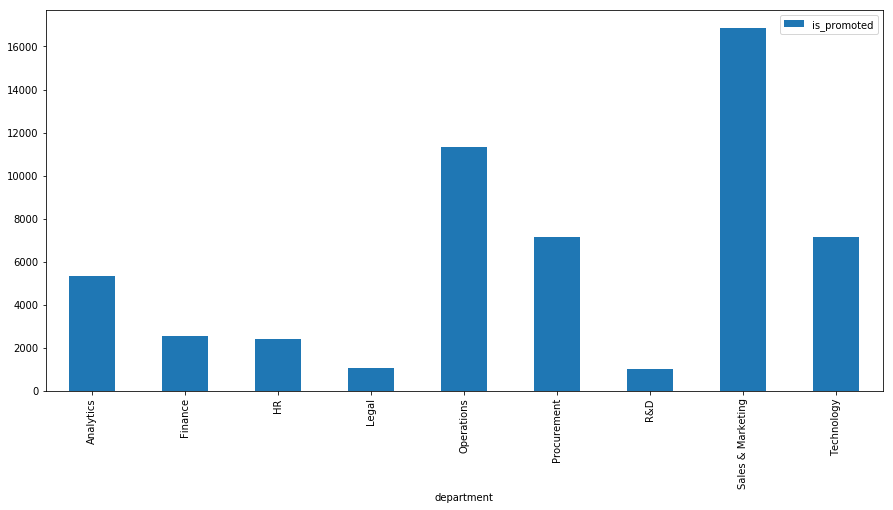

In [467]:
dept_prom = df_train.groupby('department').agg({'is_promoted':'count'})
dept_prom.plot(kind = 'bar', figsize = (15,7))

In [468]:
(k[1].values/k[0].values)

array([0.10578512, 0.08841202, 0.05959684, 0.05375254, 0.0990799 ,
       0.10666667, 0.07419355, 0.07762206, 0.12056515, 0.09309932])

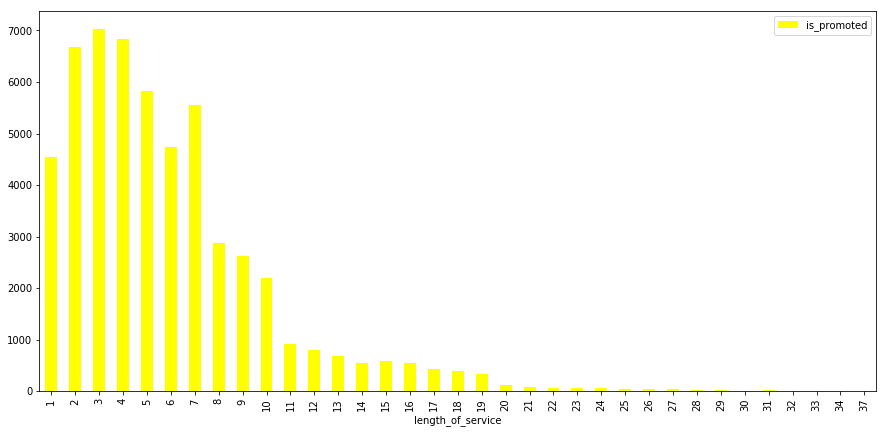

In [469]:
'''
Based on length of service, the number of employees promoted based on their eligibility 
Employees having work experience of 2-4 years have been promoted 
'''

service_promoted = df_train.groupby('length_of_service').agg({'is_promoted':'count'})
service_promoted.plot(kind = 'bar', figsize = (15,7),color = 'yellow')

In [470]:
service_promoted['is_promoted'].values.sum()

54808

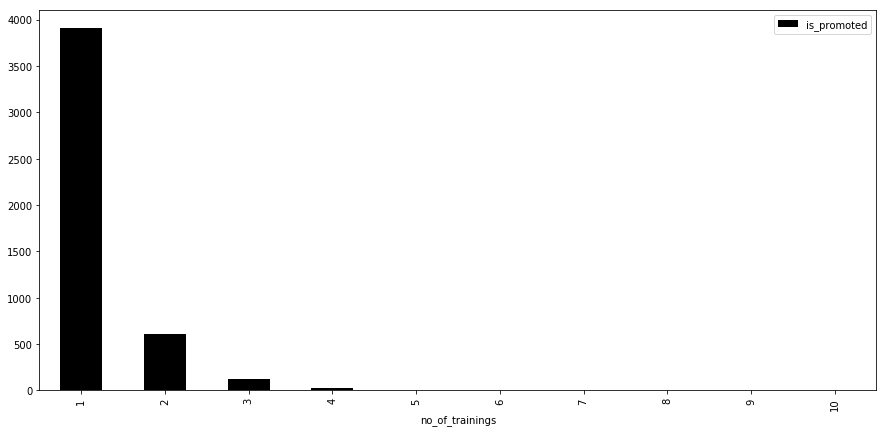

In [471]:
trainings = df_train.groupby('no_of_trainings').agg({"is_promoted":'sum'})
trainings.plot(kind = 'bar',figsize = (15,7),color = 'black')

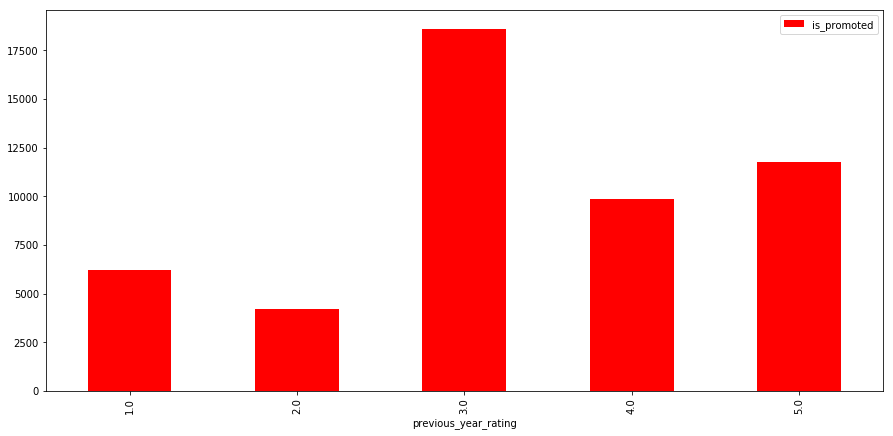

In [472]:
rating = df_train.groupby('previous_year_rating').agg({"is_promoted":'count'})
rating.plot(kind = 'bar',figsize = (15,7),color = 'red')

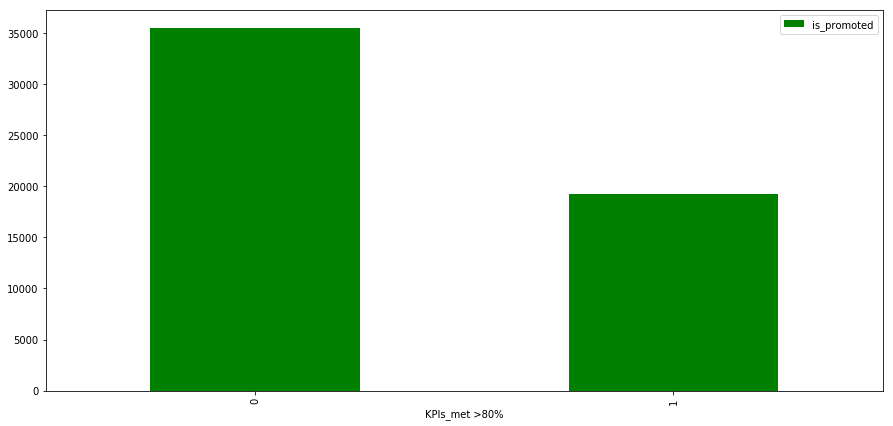

In [473]:
kpi = df_train.groupby('KPIs_met >80%').agg({"is_promoted":'count'})
kpi.plot(kind = 'bar',figsize = (15,7),color = 'green') 

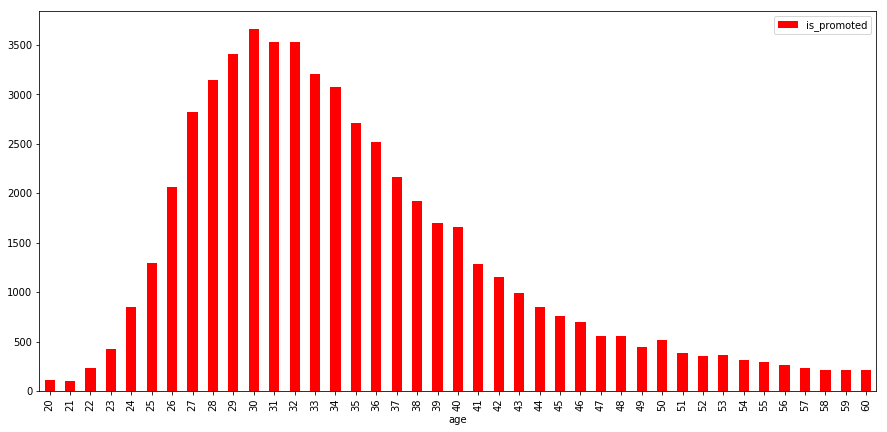

In [474]:
'''
Employees in the age group 26-37 years have been shortlisted for promotion
'''
age = df_train.groupby('age').agg({"is_promoted":'count'})
age.plot(kind = 'bar',figsize = (15,7),color = 'red') 

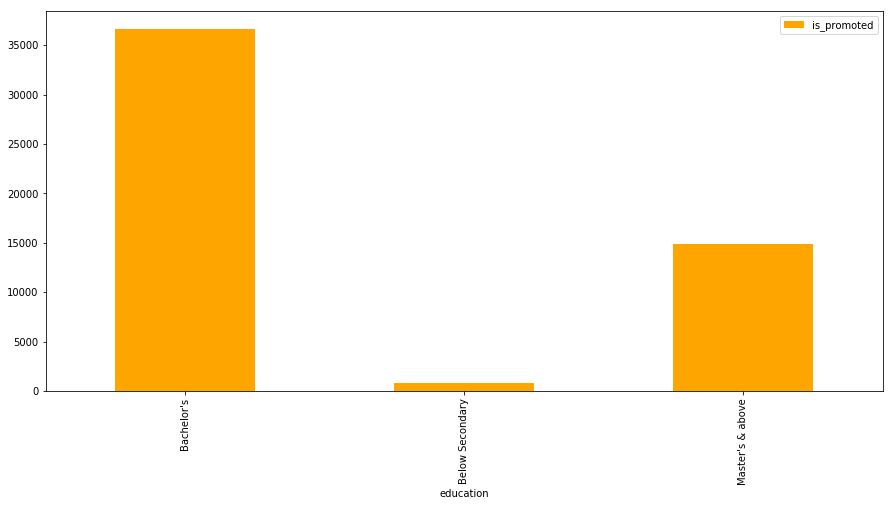

In [475]:
edu = df_train.groupby('education').agg({"is_promoted":'count'})
edu.plot(kind = 'bar',figsize = (15,7),color = 'orange') 

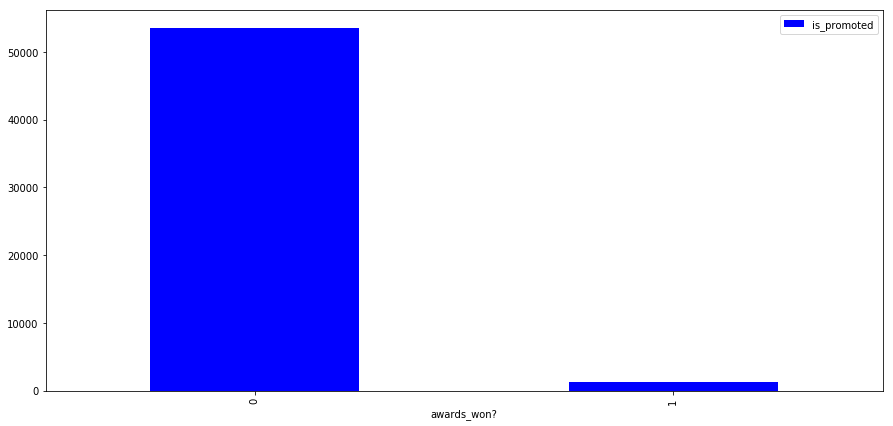

In [476]:
awards = df_train.groupby('awards_won?').agg({"is_promoted":'count'})
awards.plot(kind = 'bar',figsize = (15,7),color = 'blue') 

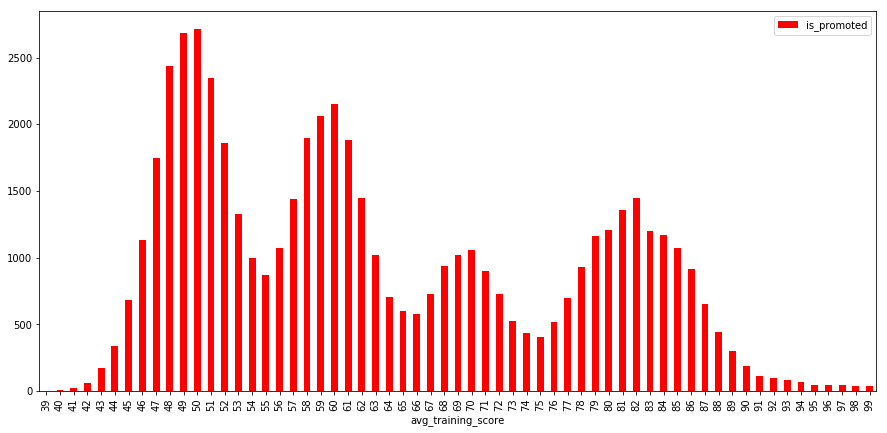

In [477]:
score = df_train.groupby('avg_training_score').agg({"is_promoted":'count'})
score.plot(kind = 'bar',figsize = (15,7),color = 'red') 

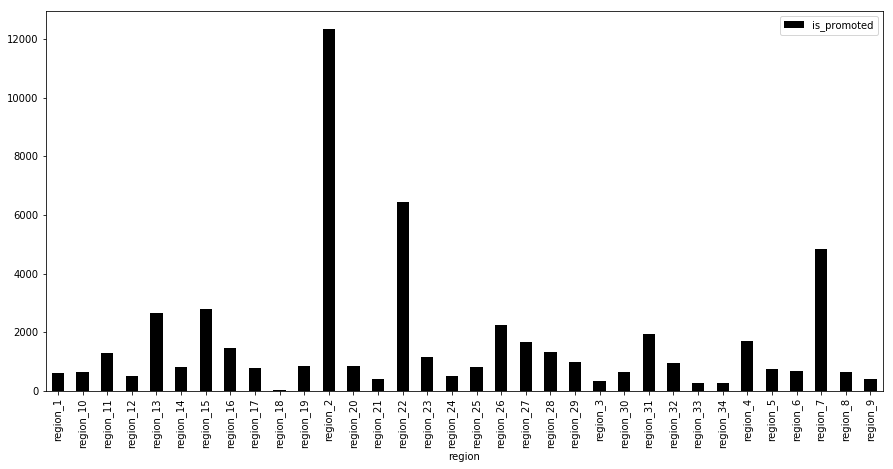

In [478]:
region = df_train.groupby('region').agg({"is_promoted":'count'})
region.plot(kind = 'bar',figsize = (15,7),color = 'black')

In [0]:
df.drop(['gender','education','awards_won?','employee_id','region','recruitment_channel','no_of_trainings'], axis = 1, inplace = True)

In [480]:
df.shape

(78298, 7)

In [481]:
df.columns

Index(['department', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'avg_training_score', 'is_promoted'],
      dtype='object')